In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# load NN_dataset
filepath = "NN_dataset.csv"
NN_data = pd.read_csv(filepath)
NN_data.columns

Index(['Customer_ID', 'Num_CC', 'Dependents', 'Status_Checking_Acc',
       'Credit_History', 'Purposre_Credit_Taken', 'Savings_Acc',
       'Years_At_Present_Employment', 'Marital_Status_Gender',
       'Other_Debtors_Guarantors', 'Other_Inst_Plans ', 'Housing', 'Job',
       'Telephone', 'Foreign_Worker', 'Duration_binned',
       'Credit_amount_binned', 'Age_binned', 'Default_On_Payment'],
      dtype='object')

In [2]:
# set Customer_ID as index
NN_data.set_index('Customer_ID',inplace=True)

In [3]:
NN_data.dtypes

Num_CC                          int64
Dependents                      int64
Status_Checking_Acc            object
Credit_History                 object
Purposre_Credit_Taken          object
Savings_Acc                    object
Years_At_Present_Employment    object
Marital_Status_Gender          object
Other_Debtors_Guarantors       object
Other_Inst_Plans               object
Housing                        object
Job                            object
Telephone                      object
Foreign_Worker                 object
Duration_binned                object
Credit_amount_binned           object
Age_binned                     object
Default_On_Payment              int64
dtype: object

In [4]:
NN_data['Num_CC'] = NN_data['Num_CC'].astype(str)
NN_data['Dependents'] = NN_data['Dependents'].astype(str)

In [5]:
NN_data.dtypes

Num_CC                         object
Dependents                     object
Status_Checking_Acc            object
Credit_History                 object
Purposre_Credit_Taken          object
Savings_Acc                    object
Years_At_Present_Employment    object
Marital_Status_Gender          object
Other_Debtors_Guarantors       object
Other_Inst_Plans               object
Housing                        object
Job                            object
Telephone                      object
Foreign_Worker                 object
Duration_binned                object
Credit_amount_binned           object
Age_binned                     object
Default_On_Payment              int64
dtype: object

In [6]:
NN_data = NN_data.drop(columns=['Num_CC', 'Dependents', 'Status_Checking_Acc', 'Credit_History', 'Savings_Acc', 'Marital_Status_Gender', 'Other_Inst_Plans ', 'Job'])

In [7]:
NN_data.dtypes

Purposre_Credit_Taken          object
Years_At_Present_Employment    object
Other_Debtors_Guarantors       object
Housing                        object
Telephone                      object
Foreign_Worker                 object
Duration_binned                object
Credit_amount_binned           object
Age_binned                     object
Default_On_Payment              int64
dtype: object

In [8]:
NN_data.columns

Index(['Purposre_Credit_Taken', 'Years_At_Present_Employment',
       'Other_Debtors_Guarantors', 'Housing', 'Telephone', 'Foreign_Worker',
       'Duration_binned', 'Credit_amount_binned', 'Age_binned',
       'Default_On_Payment'],
      dtype='object')

In [9]:
NN_data.head()

,Purposre_Credit_Taken,Years_At_Present_Employment,Other_Debtors_Guarantors,Housing,Telephone,Foreign_Worker,Duration_binned,Credit_amount_binned,Age_binned,Default_On_Payment
Customer_ID,,,,,,,,,,
100001,A43,A75,A101,A152,A192,A201,B10,B20,B35,0
100002,A43,A73,A101,A152,A191,A201,B14,B22,B30,0
100003,A46,A74,A101,A152,A191,A201,B11,B20,B33,0
100004,A42,A74,A103,A153,A191,A201,B13,B23,B33,0
100005,A40,A73,A101,A153,A191,A201,B12,B21,B33,1


In [10]:
NN_data = pd.get_dummies(NN_data)

In [11]:
NN_data

,Default_On_Payment,Purposre_Credit_Taken_A40,Purposre_Credit_Taken_A41,Purposre_Credit_Taken_A410,Purposre_Credit_Taken_A42,Purposre_Credit_Taken_A43,Purposre_Credit_Taken_A44,Purposre_Credit_Taken_A45,Purposre_Credit_Taken_A46,Purposre_Credit_Taken_A48,...,Credit_amount_binned_B24,Credit_amount_binned_B25,Credit_amount_binned_B26,Credit_amount_binned_B27,Age_binned_B30,Age_binned_B31,Age_binned_B32,Age_binned_B33,Age_binned_B34,Age_binned_B35
Customer_ID,,,,,,,,,,,,,,,,,,,,,
100001,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
100002,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
100003,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
100004,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
100005,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104996,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
104997,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
104998,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [12]:
data = NN_data.values
X = data[:, 1:77]
y = data[:, 0]

In [13]:
len(NN_data.columns)

46

In [14]:
X.shape, y.shape

((5000, 45), (5000,))

In [15]:
X[0]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1], dtype=int64)

In [16]:
# one-hot encode y (y data is already label encoded)
one_hot_y = to_categorical(y)
one_hot_y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [17]:
one_hot_y[0]

array([1., 0.], dtype=float32)

In [18]:
#split data to train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, one_hot_y, random_state=1)

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3750, 45), (1250, 45), (3750, 2), (1250, 2))

In [20]:
# create basic single hidden layer model to test (ignore future version warning)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=51, activation='relu', input_dim=45))
model.add(Dense(units=51, activation='relu'))
model.add(Dense(units=51, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 51)                2346      
_________________________________________________________________
dense_1 (Dense)              (None, 51)                2652      
_________________________________________________________________
dense_2 (Dense)              (None, 51)                2652      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 104       
Total params: 7,754
Trainable params: 7,754
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [23]:
# Fit the model to the training data
model.fit(
    X_train,
    y_train,
    epochs=100,
    shuffle=True,
    verbose=2
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/100
3750/3750 - 0s - loss: 0.5809 - acc: 0.7005
Epoch 2/100
3750/3750 - 0s - loss: 0.4982 - acc: 0.7448
Epoch 3/100
3750/3750 - 0s - loss: 0.4443 - acc: 0.7867
Epoch 4/100
3750/3750 - 0s - loss: 0.3757 - acc: 0.8325
Epoch 5/100
3750/3750 - 0s - loss: 0.3211 - acc: 0.8605
Epoch 6/100
3750/3750 - 0s - loss: 0.2629 - acc: 0.8893
Epoch 7/100
3750/3750 - 0s - loss: 0.2154 - acc: 0.9120
Epoch 8/100
3750/3750 - 0s - loss: 0.1919 - acc: 0.9213
Epoch 9/100
3750/3750 - 0s - loss: 0.1715 - acc: 0.9229
Epoch 10/100
3750/3750 - 0s - loss: 0.1586 - acc: 0.9299
Epoch 11/100
3750/3750 - 0s - loss: 0.1510 - acc: 0.9328
Epoch 12/100
3750/3750 - 0s - loss: 0.1396 - acc: 0.9381
Epoch 13/100
3750/3750 - 0s - loss: 0.1368 - acc: 0.9403
Epoch 14/100
3750/3750 - 0s - loss: 0.1415 - acc: 0.9363
Epoch 15/100
3750/3750 - 0s - loss: 0.1320 - acc: 0.9352
Epoch 16/100
3750/3750 - 0s - loss: 0.1322 - acc: 0.9379
Epo

In [24]:
model_loss, model_accuracy = model.evaluate(
    X_test, y_test, verbose=2)
print(f"model - Loss: {model_loss}, Accuracy: {model_accuracy}")

1250/1250 - 0s - loss: 0.1030 - acc: 0.9368
model - Loss: 0.10301915714740753, Accuracy: 0.9368000030517578


In [25]:
from sklearn.metrics import classification_report

predictions = model.predict(X_test).round()
print(classification_report(y_test, predictions, target_names=["no-default", "default"]))

              precision    recall  f1-score   support

  no-default       0.95      0.96      0.96       901
     default       0.90      0.87      0.89       349

   micro avg       0.94      0.94      0.94      1250
   macro avg       0.92      0.92      0.92      1250
weighted avg       0.94      0.94      0.94      1250
 samples avg       0.94      0.94      0.94      1250



In [26]:
import seaborn as sns
from sklearn import preprocessing,metrics
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix

In [27]:
sns.set('talk', 'whitegrid', 'dark', font_scale=1,rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
def plotAUC(truth, pred, lab):
    fpr, tpr, _ = metrics.roc_curve(truth,pred)
    roc_auc = metrics.auc(fpr, tpr)
    lw = 2
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color= c,lw=lw, label= lab +'(AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve') #Receiver Operating Characteristic 
    plt.legend(loc="lower right")
    plt.show()

In [28]:
def decode(datum):
    return np.argmax(datum)

In [29]:
output1 = []

for i in range(y_test.shape[0]):
    datum = y_test[i]
    decoded_datum = decode(y_test[i])
    output1.append(decoded_datum)

In [30]:
decoded_y_test = output1

In [31]:
output2 = []

for i in range(predictions.shape[0]):
    datum = predictions[i]
    decoded_datum = decode(predictions[i])
    output2.append(decoded_datum)

In [32]:
decoded_predictions = output2


In [33]:
#Create function to calculate Confusion Matrix
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
    cm = confusion_matrix(decoded_y_test, model, labels=[0, 1])
    classes=["No Default", "Defaulted"]
    
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylim(-0.5,1.5)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

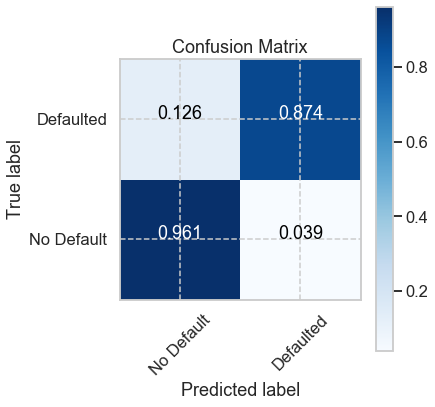

In [34]:
plt.figure(figsize=(6,6))
plot_confusion_matrix(decoded_predictions, normalize=True)